In [114]:
# imports
import sys
sys.path.append('../')

from glob import glob
from src.load_data import master_load
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Activation, BatchNormalization, Conv1D, Conv2D,
                                     Dense, Dropout, Flatten, LSTM, MaxPooling1D,
                                     Reshape, TimeDistributed)
from tensorflow.math import confusion_matrix

In [2]:
# set plotting params
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 32
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 32
plt.rcParams['figure.titlesize'] = 48

In [3]:
X_train, X_test, y_train, y_test = master_load()

In [48]:
seven_XT = X_train[:, 6, :]
fifteen_XT = X_train[:, 14, :]

seven_Xt = X_test[:, 6, :]
fifteen_Xt = X_test[:, 14, :]

In [49]:
X_train_slice = np.stack((seven_XT, fifteen_XT), axis=1)
X_test_slice = np.stack((seven_Xt, fifteen_Xt), axis=1)

In [52]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=X_train_slice.shape[1:]))

model.add(LSTM(64, return_sequences=True))

model.add(TimeDistributed(
    Dense(32, activation='relu')))

model.add(TimeDistributed(
    Dense(8, activation='relu')))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [53]:
epochs = 5
batch_size = 32

fitted = model.fit(X_train_slice, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_slice, y_test))
score = fitted.model.evaluate(X_test_slice, y_test, batch_size=batch_size)

model_name = f'../models/numpy/acc_{round(score[1], 3)}-loss_{round(score[0], 2)}-{int(time.time())}.model'

df = pd.DataFrame.from_dict(fitted.history)
df['model_name'] = model_name
fitted.model.save(model_name)

print('done')

Epoch 1/5
8825/8825 [==============================] - 129s 14ms/step - loss: 1.0045 - accuracy: 0.4672 - val_loss: 1.1875 - val_accuracy: 0.3950
Epoch 2/5
8825/8825 [==============================] - 99s 11ms/step - loss: 0.9090 - accuracy: 0.5374 - val_loss: 1.6000 - val_accuracy: 0.3832
Epoch 3/5
8825/8825 [==============================] - 41s 5ms/step - loss: 0.8161 - accuracy: 0.5952 - val_loss: 2.2922 - val_accuracy: 0.3729
Epoch 4/5
8825/8825 [==============================] - 27s 3ms/step - loss: 0.7262 - accuracy: 0.6441 - val_loss: 2.9586 - val_accuracy: 0.3586
Epoch 5/5
1102/1102 [==============================] - 1s 1ms/step - loss: 3.9545 - accuracy: 0.3567


INFO:tensorflow:Assets written to: ../models/numpy/acc_0.357-loss_3.95-1628210380.model/assets


INFO:tensorflow:Assets written to: ../models/numpy/acc_0.357-loss_3.95-1628210380.model/assets


done


In [68]:
# modified
model = Sequential()

model.add(Conv1D(64, (1), input_shape=X_train_slice.shape[1:]))
# model.add(Conv2D(16, (3, 3), input_shape=X_train.shape[1:]))  # Test the Conv2D
model.add(Activation('selu'))

model.add(Conv1D(32, (2)))
model.add(Activation('selu'))

model.add(MaxPooling1D((2), padding='same'))
model.add(Flatten())

model.add(Dense(64))
model.add(Activation('selu'))

model.add(Dense(16))
model.add(Activation('selu'))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [69]:
epochs = 5
batch_size = 32

fitted = model.fit(X_train_slice, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_slice, y_test))
score = fitted.model.evaluate(X_test_slice, y_test, batch_size=batch_size)

model_name = f'../models/numpy/acc_{round(score[1], 3)}-loss_{round(score[0], 2)}-{int(time.time())}.model'

temp_df = pd.DataFrame.from_dict(fitted.history)
temp_df['model_name'] = model_name
df = pd.concat([df, temp_df])
fitted.model.save(model_name)

print('done')

Epoch 1/5
8825/8825 [==============================] - 9s 1ms/step - loss: 0.9663 - accuracy: 0.5138 - val_loss: 1.3127 - val_accuracy: 0.4113
Epoch 2/5
8825/8825 [==============================] - 9s 979us/step - loss: 0.8489 - accuracy: 0.5990 - val_loss: 1.6125 - val_accuracy: 0.3751
Epoch 3/5
8825/8825 [==============================] - 9s 969us/step - loss: 0.7638 - accuracy: 0.6544 - val_loss: 1.6978 - val_accuracy: 0.3999
Epoch 4/5
8825/8825 [==============================] - 9s 1ms/step - loss: 0.7017 - accuracy: 0.6896 - val_loss: 1.9903 - val_accuracy: 0.3869
Epoch 5/5
1102/1102 [==============================] - 1s 539us/step - loss: 2.1184 - accuracy: 0.3751
INFO:tensorflow:Assets written to: ../models/numpy/acc_0.375-loss_2.12-1628214241.model/assets


INFO:tensorflow:Assets written to: ../models/numpy/acc_0.375-loss_2.12-1628214241.model/assets


done


In [83]:
# modified
model = Sequential()

model.add(Conv1D(64, (2), input_shape=X_train_slice.shape[1:]))
model.add(Activation('relu'))

model.add(Conv1D(64, (1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2), padding='same'))

model.add(Conv1D(64, (1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2), padding='same'))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [84]:
epochs = 5
batch_size = 32

fitted = model.fit(X_train_slice, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_slice, y_test))
score = fitted.model.evaluate(X_test_slice, y_test, batch_size=batch_size)

model_name = f'../models/numpy/acc_{round(score[1], 3)}-loss_{round(score[0], 2)}-{int(time.time())}.model'

temp_df = pd.DataFrame.from_dict(fitted.history)
temp_df['model_name'] = model_name
df = pd.concat([df, temp_df])
fitted.model.save(model_name)

print('done')

Epoch 1/5
8825/8825 [==============================] - 11s 1ms/step - loss: 1.0665 - accuracy: 0.3988 - val_loss: 1.0801 - val_accuracy: 0.4134
Epoch 2/5
8825/8825 [==============================] - 10s 1ms/step - loss: 1.0024 - accuracy: 0.4583 - val_loss: 1.2568 - val_accuracy: 0.3985
Epoch 3/5
8825/8825 [==============================] - 10s 1ms/step - loss: 0.9511 - accuracy: 0.4984 - val_loss: 1.4195 - val_accuracy: 0.4103
Epoch 4/5
8825/8825 [==============================] - 11s 1ms/step - loss: 0.8986 - accuracy: 0.5413 - val_loss: 2.2251 - val_accuracy: 0.3641
Epoch 5/5
1102/1102 [==============================] - 1s 544us/step - loss: 2.9589 - accuracy: 0.3535
INFO:tensorflow:Assets written to: ../models/numpy/acc_0.354-loss_2.96-1628214425.model/assets


INFO:tensorflow:Assets written to: ../models/numpy/acc_0.354-loss_2.96-1628214425.model/assets


done


In [88]:
# stolen 1
model = Sequential()

model.add(Conv1D(128, (1), input_shape=X_train_slice.shape[1:]))
model.add(Activation('relu'))

model.add(Conv1D(63, (2)))
model.add(Activation('relu'))

model.add(MaxPooling1D(pool_size=(2), padding='same'))

model.add(Conv1D(64, (1)))
model.add(Activation('relu'))

model.add(MaxPooling1D(pool_size=(2), padding='same'))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
epochs = 5
batch_size = 32

fitted = model.fit(X_train_slice, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_slice, y_test))
score = fitted.model.evaluate(X_test_slice, y_test, batch_size=batch_size)

model_name = f'../models/numpy/acc_{round(score[1], 3)}-loss_{round(score[0], 2)}-{int(time.time())}.model'

temp_df = pd.DataFrame.from_dict(fitted.history)
temp_df['model_name'] = model_name
df = pd.concat([df, temp_df])
fitted.model.save(model_name)

print('done')

Epoch 1/5
8825/8825 [==============================] - 13s 1ms/step - loss: 1.0280 - accuracy: 0.4336 - val_loss: 1.2244 - val_accuracy: 0.3822
Epoch 2/5
8825/8825 [==============================] - 12s 1ms/step - loss: 0.9160 - accuracy: 0.5270 - val_loss: 1.5346 - val_accuracy: 0.3824
Epoch 3/5
8825/8825 [==============================] - 12s 1ms/step - loss: 0.8141 - accuracy: 0.5936 - val_loss: 2.7531 - val_accuracy: 0.3717
Epoch 4/5
8825/8825 [==============================] - 12s 1ms/step - loss: 0.7384 - accuracy: 0.6410 - val_loss: 2.8335 - val_accuracy: 0.3523
Epoch 5/5
1102/1102 [==============================] - 1s 563us/step - loss: 4.4296 - accuracy: 0.3593
INFO:tensorflow:Assets written to: ../models/numpy/acc_0.359-loss_4.43-1628214630.model/assets


INFO:tensorflow:Assets written to: ../models/numpy/acc_0.359-loss_4.43-1628214630.model/assets


done


In [95]:
reshape = (-1, 2, 60)

train_X = np.clip(np.array(X_train_slice).reshape(reshape), -10, 10) / 10
test_X = np.clip(np.array(X_test_slice).reshape(reshape), -10, 10) / 10

In [99]:
# stolen 2
model = Sequential()

model.add(Conv1D(128, (1), padding='same', input_shape=train_X.shape[1:]))
model.add(Activation('relu'))

model.add(Conv1D(64, (5), padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(16, (5), padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(8, (5), padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(3, (2)))
model.add(Reshape((3,)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [102]:
epochs = 5
batch_size = 32

fitted = model.fit(train_X, y_train, batch_size=batch_size, epochs=epochs, validation_data=(test_X, y_test))
score = fitted.model.evaluate(test_X, y_test, batch_size=batch_size)

model_name = f'../models/numpy/acc_{round(score[1], 3)}-loss_{round(score[0], 2)}-{int(time.time())}.model'

temp_df = pd.DataFrame.from_dict(fitted.history)
temp_df['model_name'] = model_name
df = pd.concat([df, temp_df])
fitted.model.save(model_name)

print('done')

Epoch 1/5
8825/8825 [==============================] - 56s 6ms/step - loss: 0.1120 - accuracy: 0.9583 - val_loss: 5.5328 - val_accuracy: 0.3722
Epoch 2/5
8825/8825 [==============================] - 56s 6ms/step - loss: 0.1052 - accuracy: 0.9612 - val_loss: 6.0297 - val_accuracy: 0.3479
Epoch 3/5
8825/8825 [==============================] - 59s 7ms/step - loss: 0.0960 - accuracy: 0.9648 - val_loss: 6.6708 - val_accuracy: 0.3612
Epoch 4/5
8825/8825 [==============================] - 63s 7ms/step - loss: 0.0892 - accuracy: 0.9676 - val_loss: 6.7209 - val_accuracy: 0.3545
Epoch 5/5
1102/1102 [==============================] - 1s 652us/step - loss: 6.5968 - accuracy: 0.3664
INFO:tensorflow:Assets written to: ../models/numpy/acc_0.366-loss_6.6-1628215727.model/assets


INFO:tensorflow:Assets written to: ../models/numpy/acc_0.366-loss_6.6-1628215727.model/assets


done


In [136]:
def residual_block(x, filters, conv_num=3, activation="relu"):
    # Shortcut
    s = keras.layers.Conv1D(filters, 1, padding="same")(x)
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding="same")(x)
        x = keras.layers.Activation(activation)(x)
    x = keras.layers.Conv1D(filters, 3, padding="same")(x)
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    return keras.layers.MaxPool1D(pool_size=2, strides=2, padding='same')(x)

In [153]:
def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape=input_shape, name="input")

    x = residual_block(inputs, 16, 2)
    x = residual_block(x, 32, 2)
    x = residual_block(x, 64, 3)
    x = residual_block(x, 128, 3)
    x = residual_block(x, 128, 3)

    x = keras.layers.MaxPooling1D(pool_size=(2), padding='same')(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation="softmax", name="output")(x)

    return keras.models.Model(inputs=inputs, outputs=outputs)

In [154]:
model = build_model((train_X.shape[1:]), 3)

In [155]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [156]:
epochs = 5
batch_size = 32

fitted = model.fit(X_train_slice, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_slice, y_test))
score = fitted.model.evaluate(X_test_slice, y_test, batch_size=batch_size)

model_name = f'../models/numpy/acc_{round(score[1], 3)}-loss_{round(score[0], 2)}-{int(time.time())}.model'

temp_df = pd.DataFrame.from_dict(fitted.history)
temp_df['model_name'] = model_name
df = pd.concat([df, temp_df])
fitted.model.save(model_name)

print('done')

Epoch 1/5
8825/8825 [==============================] - 78s 9ms/step - loss: 1.0028 - accuracy: 0.4740 - val_loss: 1.3235 - val_accuracy: 0.3958
Epoch 2/5
8825/8825 [==============================] - 75s 9ms/step - loss: 0.9151 - accuracy: 0.5442 - val_loss: 1.7803 - val_accuracy: 0.3825
Epoch 3/5
8825/8825 [==============================] - 78s 9ms/step - loss: 0.8552 - accuracy: 0.5861 - val_loss: 2.0003 - val_accuracy: 0.3964
Epoch 4/5
8825/8825 [==============================] - 87s 10ms/step - loss: 0.8057 - accuracy: 0.6147 - val_loss: 2.2174 - val_accuracy: 0.3866
Epoch 5/5
1102/1102 [==============================] - 1s 1ms/step - loss: 1.9288 - accuracy: 0.3926


/Users/josiah/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: ../models/numpy/acc_0.393-loss_1.93-1628216692.model/assets


INFO:tensorflow:Assets written to: ../models/numpy/acc_0.393-loss_1.93-1628216692.model/assets


done


In [109]:
best_model = sorted(glob('../models/numpy/*.model'))[-1]

In [110]:
model = tf.keras.models.load_model(best_model)

y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
conf_mat = np.round(np.array(confusion_matrix(y_true, y_pred)) / 11750, 3)

In [111]:
def plot_conf_mat(conf_mat):
    actions = ['left', 'none', 'right']

    fig, ax = plt.subplots(figsize=(16, 9))

    ax.matshow(conf_mat, cmap=plt.cm.RdYlGn)
    ax.set_xticklabels([""]+actions)
    ax.set_yticklabels([""]+actions)

    for i, val0 in enumerate(conf_mat.T):
        for ii, val1 in enumerate(val0):
            ax.text(i, ii, f"{val1}", va='center', ha='center')

    plt.title("Action Thought")
    plt.ylabel("Predicted Action")
    plt.show()

<ipython-input-111-f83a402bc218>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+actions)
<ipython-input-111-f83a402bc218>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""]+actions)


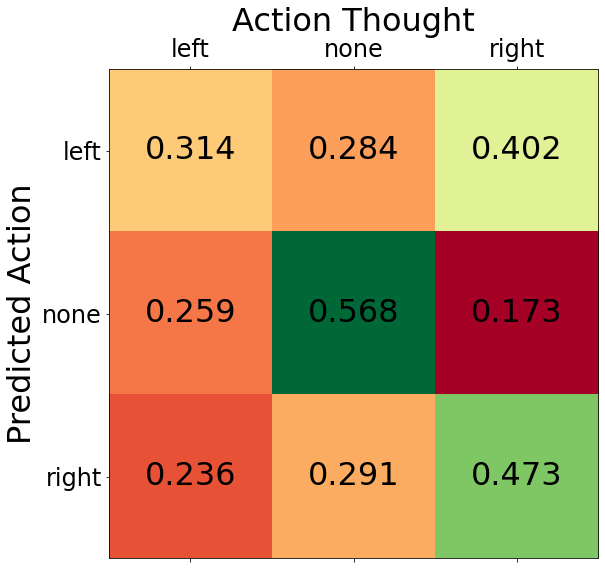

In [112]:
plot_conf_mat(conf_mat)

# trained KNN, log_reg, GBC
# all trash, acc < 0.35